In [1]:
import sys
sys.path.append("../")

import os
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats
import engarde.decorators as ed

from library import test

In [11]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/impact/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'cits_match.csv'),
                  sep=",", low_memory= False)
@ed.verify(test.allyearsandtpsd)
def load():
    return data
data = load()
data[['distname', 'year', 'doi_year', 'treat', 'year_centered', 'students_hisp', 'students_num']][data.doi == True].head()

,distname,year,doi_year,treat,year_centered,students_hisp,students_num
0,CAYUGA ISD,2012,2017.0,1,-5.0,0.050847,590
1,ELKHART ISD,2012,2018.0,1,-6.0,0.078678,1271
2,FRANKSTON ISD,2012,2018.0,1,-6.0,0.103683,733
3,NECHES ISD,2012,2017.0,1,-5.0,0.099256,403
4,PALESTINE ISD,2012,2016.0,1,-4.0,0.389752,3220


In [12]:
data[data.doi == False][['distname','doi', 'doi_year', 'year', 'treat']].head()

,distname,doi,doi_year,year,treat
11,DIBOLL ISD,False,NaN,2012,0
13,CENTRAL ISD,False,NaN,2012,0
19,CHARLOTTE ISD,False,NaN,2012,0
22,PLEASANTON ISD,False,NaN,2012,0
23,POTEET ISD,False,NaN,2012,0


In [13]:
data[data.year == 2014].doi_year.value_counts().sort_index()

2016.0     75
2017.0    552
2018.0    124
2019.0     24
2020.0      1
Name: doi_year, dtype: int64

# ITS

In [14]:
df = pd.DataFrame(data.groupby(['year']).agg({'avescores': 'mean'})).reset_index()

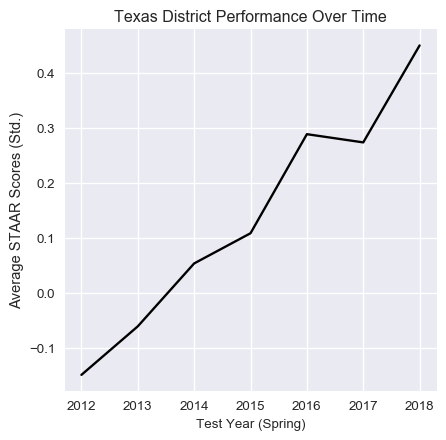

In [15]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df.year, df.avescores, color = 'black')

plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Texas District Performance Over Time')
plt.xlabel('Test Year (Spring)', size = 'medium')


plt.savefig(table_path + 'its.png', dpi = 600, bbox_inches="tight")
plt.show()

# Graph by year of implementation

In [16]:
def create_group_df(df):
    new_df = pd.DataFrame(df.groupby(['year']).agg({'avescores': ['mean', 'sem']}))
    new_df = new_df.rename(columns = {'mean': 'score_mean', 'sem': 'score_se'})
    new_df['ub'] = new_df['avescores']['score_mean'] + new_df['avescores']['score_se']
    new_df['lb'] = new_df['avescores']['score_mean'] - new_df['avescores']['score_se']
    return new_df
df_control = create_group_df(data[data.doi == False])
df_treat2016 = create_group_df(data[data.doi_year == 2016])
df_treat2017 = create_group_df(data[data.doi_year == 2017])
df_treat2018 = create_group_df(data[data.doi_year == 2018])
df_control

avescores                  ub        lb
     score_mean  score_se                    
year                                         
2012  -0.451814  0.045365 -0.406450 -0.497179
2013  -0.395731  0.049380 -0.346351 -0.445111
2014  -0.291087  0.049002 -0.242085 -0.340090
2015  -0.221261  0.049949 -0.171311 -0.271210
2016  -0.032995  0.049767  0.016772 -0.082762
2017  -0.062379  0.053365 -0.009015 -0.115744
2018   0.155704  0.050631  0.206335  0.105073

# Full Set of Years and Groups

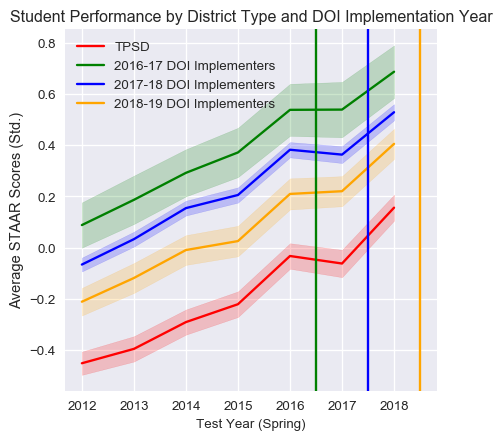

In [17]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control.index, df_control['avescores']['score_mean'], color = 'red', label = 'TPSD')
plt.plot(df_treat2016.index, df_treat2016['avescores']['score_mean'], color = 'green', label = '2016-17 DOI Implementers')
plt.plot(df_treat2017.index, df_treat2017['avescores']['score_mean'], color = 'blue', label = '2017-18 DOI Implementers')
plt.plot(df_treat2018.index, df_treat2018['avescores']['score_mean'], color = 'orange', label = '2018-19 DOI Implementers')

plt.legend()


plt.fill_between(df_control.index, df_control.lb, df_control.ub, color = 'red', alpha = .2)
plt.fill_between(df_treat2016.index, df_treat2016.lb, df_treat2016.ub, color = 'green', alpha = .2)
plt.fill_between(df_treat2017.index, df_treat2017.lb, df_treat2017.ub, color = 'blue', alpha = .2)
plt.fill_between(df_treat2018.index, df_treat2018.lb, df_treat2018.ub, color = 'orange', alpha = .2)

plt.axvline(x = 2016.5, color = 'green')
plt.axvline(x = 2017.5, color = 'blue')
plt.axvline(x = 2018.5, color = 'orange')



plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Student Performance by District Type and DOI Implementation Year')
plt.xlabel('Test Year (Spring)', size = 'medium')


plt.savefig(table_path + 'all districts and dates.png', dpi = 600, bbox_inches="tight")
plt.show()

# Centered
We're not looking at this graph for evidence of parallel trends. Just to look at the impact.

# Evidence of Parallel Trends

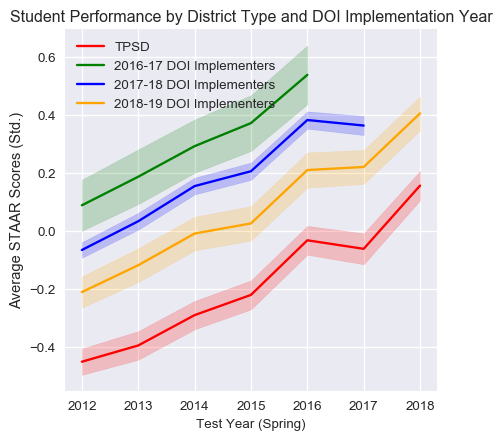

In [18]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control.index, df_control['avescores']['score_mean'], color = 'red', label = 'TPSD')
plt.plot(df_treat2016[df_treat2016.index <= 2016].index, df_treat2016[df_treat2016.index <= 2016]['avescores']['score_mean'], color = 'green', label = '2016-17 DOI Implementers')
plt.plot(df_treat2017[df_treat2017.index <= 2017].index, df_treat2017[df_treat2017.index <= 2017]['avescores']['score_mean'], color = 'blue', label = '2017-18 DOI Implementers')
plt.plot(df_treat2018[df_treat2018.index <= 2018].index, df_treat2018[df_treat2018.index <= 2018]['avescores']['score_mean'], color = 'orange', label = '2018-19 DOI Implementers')

plt.legend()

plt.fill_between(df_control.index, df_control.lb, df_control.ub, color = 'red', alpha = .2)
plt.fill_between(df_treat2016[df_treat2016.index <= 2016].index, df_treat2016[df_treat2016.index <= 2016].lb, df_treat2016[df_treat2016.index <= 2016].ub, color = 'green', alpha = .2)
plt.fill_between(df_treat2017[df_treat2017.index <= 2017].index, df_treat2017[df_treat2017.index <= 2017].lb, df_treat2017[df_treat2017.index <= 2017].ub, color = 'blue', alpha = .2)
plt.fill_between(df_treat2018[df_treat2018.index <= 2018].index, df_treat2018[df_treat2018.index <= 2018].lb, df_treat2018[df_treat2018.index <= 2018].ub, color = 'orange', alpha = .2)


plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Student Performance by District Type and DOI Implementation Year')
plt.xlabel('Test Year (Spring)', size = 'medium')

plt.savefig(table_path + 'parallel_trends_by_adoption.png', bbox_inches="tight")

plt.show()

# Weighted Parallel Trends

In [19]:
total_weight_TPSD = sum(data[data.treat == 0].psweight2)
total_weight_DOI16 = sum(data[data.doi_year == 2016].psweight2)
total_weight_DOI17 = sum(data[data.doi_year == 2017].psweight2)
total_weight_DOI18 = sum(data[data.doi_year == 2018].psweight2)
data['pswtshare2'] = np.where(data.treat == 0, (data.psweight2/total_weight_TPSD),
                          np.where(data.doi_year == 2016,(data.psweight2/total_weight_DOI16),
                          np.where(data.doi_year == 2017, (data.psweight2/total_weight_DOI17), 
                                  np.where(data.doi_year == 2018, (data.psweight2/total_weight_DOI18), 0))))
sum(data[data.doi == False].pswtshare2)
data['score_weighted'] = (data.avescores * data.pswtshare2)
data[data.doi == False][['distname','avescores', 'pswtshare2', 'score_weighted']].head()

,distname,avescores,pswtshare2,score_weighted
11,DIBOLL ISD,-0.307598,NaN,NaN
13,CENTRAL ISD,0.274106,NaN,NaN
19,CHARLOTTE ISD,-1.775741,NaN,NaN
22,PLEASANTON ISD,-0.120330,NaN,NaN
23,POTEET ISD,-0.701036,NaN,NaN


In [20]:
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['score_weighted'].sum()).reset_index()
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['score_weighted'].sum()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['score_weighted'].sum()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['score_weighted'].sum()).reset_index()
df_control

,year,score_weighted
0,2012,0.0
1,2013,0.0
2,2014,0.0
3,2015,0.0
4,2016,0.0
5,2017,0.0
6,2018,0.0


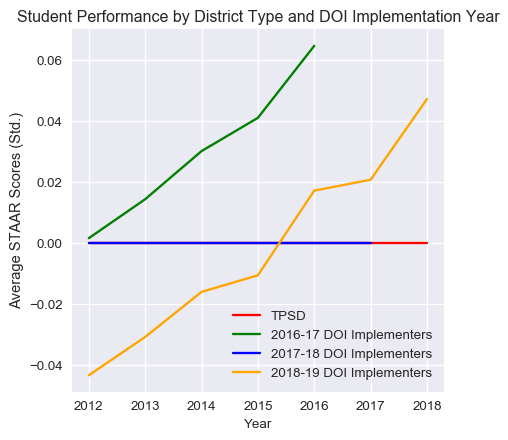

In [21]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control.year, df_control.score_weighted, color = 'red', label = 'TPSD')
plt.plot(df_treat2016[df_treat2016.year <= 2016].year, df_treat2016[df_treat2016.year <= 2016].score_weighted, color = 'green', label = '2016-17 DOI Implementers')
plt.plot(df_treat2017[df_treat2017.year <= 2017].year, df_treat2017[df_treat2017.year <= 2017].score_weighted, color = 'blue', label = '2017-18 DOI Implementers')
plt.plot(df_treat2018[df_treat2018.year <= 2018].year, df_treat2018[df_treat2018.year <= 2018].score_weighted, color = 'orange', label = '2018-19 DOI Implementers')

plt.legend()



plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Student Performance by District Type and DOI Implementation Year')
plt.xlabel('Year', size = 'medium')

#plt.savefig(table_path + 'CITS.png', bbox_inches="tight")

plt.show()
#TODO: WTF the trends and scale

# DOI vs TPS

In [22]:
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['avescores'].mean()).reset_index()
df_treat = pd.DataFrame(data[data.doi == True].groupby(['year'])['avescores'].mean()).reset_index()
df_treat

,year,avescores
0,2012,-0.074226
1,2013,0.021222
2,2014,0.137571
3,2015,0.188083
4,2016,0.366305
5,2017,0.353575
6,2018,0.520280


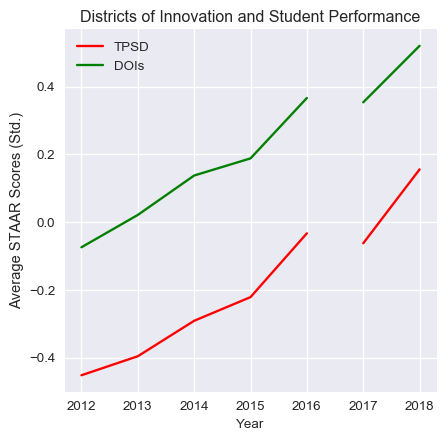

In [23]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control[df_control.year < 2017].year, df_control[df_control.year < 2017].avescores, color = 'red', label = 'TPSD')
plt.plot(df_treat[df_treat.year < 2017].year, df_treat[df_treat.year < 2017].avescores, color = 'green', label = 'DOIs')
plt.legend()

plt.plot(df_control[df_control.year >= 2017].year, df_control[df_control.year >= 2017].avescores, color = 'red')
plt.plot(df_treat[df_treat.year >= 2017].year, df_treat[df_treat.year >= 2017].avescores, color = 'green')





plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')


plt.show()


# Weighted Average

In [24]:
data['score_weighted'] = (data.avescores * data.pswtshare)/100
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['score_weighted'].sum()).reset_index()
df_treat = pd.DataFrame(data[data.doi == True].groupby(['year'])['score_weighted'].sum()).reset_index()
df_control

AttributeError: 'DataFrame' object has no attribute 'pswtshare'

In [ ]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control[df_control.year < 2017].year, df_control[df_control.year < 2017].score_weighted, color = 'red', label = 'TPSD')
plt.plot(df_treat[df_treat.year < 2017].year, df_treat[df_treat.year < 2017].score_weighted, color = 'green', label = 'DOIs')
plt.legend()

plt.plot(df_control[df_control.year >= 2017].year, df_control[df_control.year >= 2017].score_weighted, color = 'red')
plt.plot(df_treat[df_treat.year >= 2017].year, df_treat[df_treat.year >= 2017].score_weighted, color = 'green')





plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')


plt.show()

# Demographic Trends

In [ ]:
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2018

In [ ]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control.year, df_control.students_hisp, color = 'red', label = 'TPS')
plt.plot(df_treat2016.year, df_treat2016.students_hisp, color = 'green', label = '2016-17 Implementers')
plt.plot(df_treat2017.year, df_treat2017.students_hisp, color = 'blue', label = '2017-18 Implementers')
plt.plot(df_treat2018.year, df_treat2018.students_hisp, color = 'orange', label = '2018-19 Implementers')

plt.legend()



plt.ylabel('Percent Hispanic')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')

#plt.savefig(table_path + 'CITS.png', bbox_inches="tight")

plt.show()

In [ ]:
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['students_num'].mean()).reset_index()
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['students_num'].mean()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['students_num'].mean()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['students_num'].mean()).reset_index()
df_treat2018

In [ ]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control.year, df_control.students_num, color = 'red', label = 'TPS')
plt.plot(df_treat2016[df_treat2016.year <= 2016].year, df_treat2016[df_treat2016.year <= 2016].students_num, color = 'green', label = '2016-17 Implementers')
plt.plot(df_treat2017[df_treat2017.year <= 2017].year, df_treat2017[df_treat2017.year <= 2017].students_num, color = 'blue', label = '2017-18 Implementers')
plt.plot(df_treat2018[df_treat2018.year <= 2018].year, df_treat2018[df_treat2018.year <= 2018].students_num, color = 'orange', label = '2018-19 Implementers')

plt.legend()



plt.ylabel('Number of Students')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')

#plt.savefig(table_path + 'CITS.png', bbox_inches="tight")

plt.show()

In [ ]:
#  Who are 2016-17 implementers
data[(data.doi_year == 2016) & (data.year == 2018)][['distname', 'students_num']]
